## Likes Report
By Liam M. Goldstein, 
Using sample data gathered by David E. Silva

This report will answer the question of "How frequently did an account like content from other accounts?". The likes specifically refer to the likes on other account's posts. I ask this question because understanding how the behavior of social media affects a person can help us to understand that person's particular interest and/or how they react to those other accounts.

## 1. Install Required Packages for Assignment

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import json
import seaborn

### 2. Read data from the JSON file

The data for this report comes from the "Your Instagram Data" files available for download through the user's "Privacy and Security" settings. In the data dump is a file named "likes.json" which was read in and loaded to a Python 3 environment.

2.1 Open the JSON file and show the raw data

In [13]:
with open(r'C:\Users\ohiok\anaconda3\likes.json') as l:
    likes = json.load(l)
likes

{'media_likes': [['2020-07-11T04:39:28+00:00', 'ball_doesnt_lie'],
  ['2020-07-11T04:39:05+00:00', 'ball_doesnt_lie'],
  ['2020-07-05T17:25:44+00:00', 'ali_saurusrex'],
  ['2020-07-03T03:40:02+00:00', 'cacandassociates'],
  ['2020-06-25T17:41:50+00:00', 'cacandassociates'],
  ['2020-06-22T23:01:55+00:00', 'reams_esq'],
  ['2020-06-08T15:05:46+00:00', 'emmyr0o'],
  ['2020-06-07T12:46:29+00:00', 'ali_saurusrex'],
  ['2020-06-02T01:03:28+00:00', 'colin_storm'],
  ['2020-05-25T16:38:14+00:00', 'ali_saurusrex'],
  ['2020-05-19T23:38:40+00:00', 'colin_storm'],
  ['2020-05-18T13:42:30+00:00', 'emmyr0o'],
  ['2020-05-14T13:51:03+00:00', 'emmyr0o'],
  ['2020-05-12T21:31:12+00:00', 'cacandassociates'],
  ['2020-05-11T05:07:31+00:00', 'inalull'],
  ['2020-05-07T18:07:52+00:00', 'reams_esq'],
  ['2020-05-06T00:33:58+00:00', 'inalull'],
  ['2020-04-30T19:54:48+00:00', 'emmyr0o'],
  ['2020-04-28T12:58:14+00:00', 'inalull'],
  ['2020-04-28T03:28:35+00:00', 'cacandassociates'],
  ['2020-04-26T06:41:17

2.2 Understand the length of the data for both the media and comment likes, though we will not be using the comment likes.

In [14]:
type(likes)

dict

In [15]:
likes.keys()

dict_keys(['media_likes', 'comment_likes'])

In [16]:
len(likes['media_likes'])

335

In [17]:
len(likes['comment_likes'])

2

### 3. Turn the data into a more readable format

3.1 Use the pandas data format to convert the JSON file into an easier to read format

In [20]:
mlikes_df = pd.DataFrame(likes['media_likes'], columns = ['timestamp', 'account'])
mlikes_df

,timestamp,account
0,2020-07-11T04:39:28+00:00,ball_doesnt_lie
1,2020-07-11T04:39:05+00:00,ball_doesnt_lie
2,2020-07-05T17:25:44+00:00,ali_saurusrex
3,2020-07-03T03:40:02+00:00,cacandassociates
4,2020-06-25T17:41:50+00:00,cacandassociates
...,...,...
330,2013-02-05T02:58:46+00:00,natgeo
331,2013-02-05T02:22:24+00:00,aroseroar16
332,2013-02-05T01:29:31+00:00,aroseroar16
333,2013-02-04T17:42:04+00:00,ali_saurusrex


3.2 Group the data by the account name and by how many likes that account has got throughout the history of the account used

In [21]:
mgroup_df = mlikes_df.groupby('account').count().sort_values('timestamp', ascending = False)
mgroup_df

,timestamp
account,
ali_saurusrex,68
aroseroar16,29
orangekoala2,27
a_matt_silva,18
reams_esq,16
emmyr0o,16
cacandassociates,15
danneabreanne,13
colin_storm,11


### 4. Plot the data on a Histogram and Pie Chart

4.1 Create a Histogram and show the data on the respective histogram

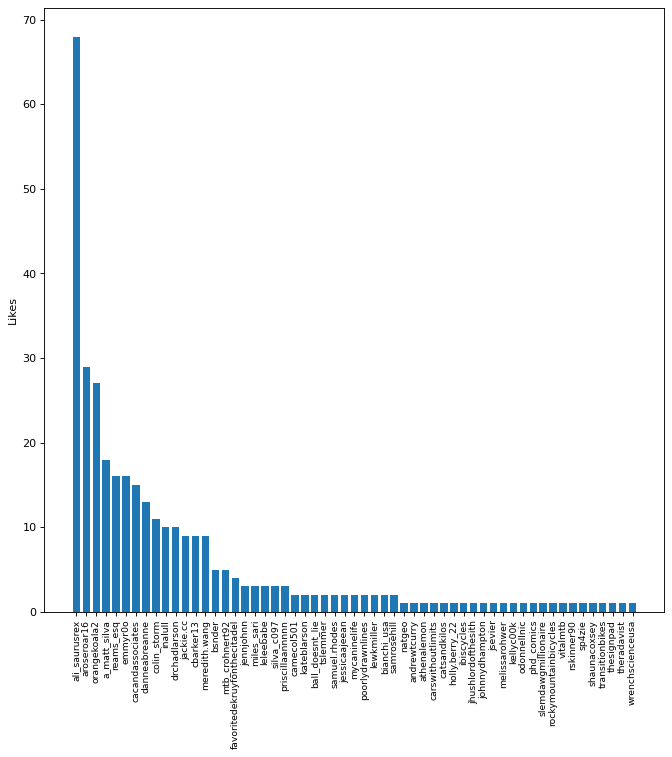

In [28]:
sortcount = mgroup_df.sort_values('timestamp', ascending = False)
labels = sortcount['timestamp'].keys()
vals = sortcount['timestamp']
width = .75

fig, ax = plt.subplots(figsize=(10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels, vals, width)
ax.set_ylabel('Likes')
plt.xticks(rotation=90, fontsize='small')
plt.show()

4.2 Create a Pie Chart to show the data as well

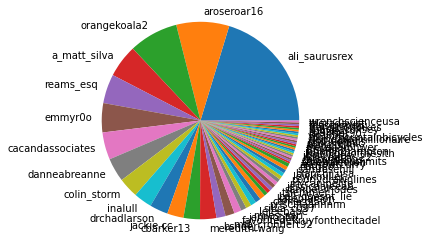

In [31]:
fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
plt.show()

Overall though, the data shows that the account in the sample data interacted with the account named "ali_saurusrex" the most amount of times